In [1]:
# This is just getting some formatting information and is not part of the tasksheet!
from IPython.core.display import HTML
import urllib.request
def start_css():
    with urllib.request.urlopen('https://github.com/uolphysicsteaching/resources/raw/main/notebook.css') as response:
        return HTML(response.read().decode("utf-8"))
start_css()

# PHYS2320 Computing 2 Lab 6 Worksheet

This worksheet can be viewed as a pdf, html page or as a JuPyter Notebook. If you are using the notebook version then you can work through the worksheet and add your code to it.

You will find it in the **Workshop 6 - Week 11** folder on the **Semester 1 Workshops** Area in the PHYS2320 Minerva pages. There are three versions, pdf, html and notebook.

## Aims

This lab's aims are

 - Introduction to the Pandas library for dealing with tables of mixed data
 - Create and do simple manipulations of DataFrames

## Getting Started

This worksheet is best viewed in JuPyter Notebook. If you have installed anaconda python on your own computer, or are using the virtual Windows desktop, then you probably have JuPyter Notebook already install. If you are using Windows, then there should be a menu entry in your start menu, on a Mac you may need to open a terminal window and type:

> jupyter notebook

# Pandas - A Python library for working with real-world data

Following on the heals of the internet revolution has been the rise of data-science and big data. The routine collection of vast quantities of information and the ability to store and access it almost instantaneously has lead to the need to process and analyze it to see trends and correlations and to visualize and present it in ways that humans can handle. Python is one of the leading tools for data science thanks in no small part to its powerful libraries such as numpy and scipy.

Although numpy is excellent for working with purely numerical data, in many real world applications datasets tend to be a mixture of text and numbers. On the other hand, in many situations we think about tables of data where each row represents a set of information about one item, with the columns holding the same category of information about each item - this is the sort of typical use of a spreadsheet.

Spreadsheet programs such as Excel tend to get unwieldy when dealing with hundreds of thousands or millions of rows of data, or when the analysis functions that need to be used are complex and this is where Python and in particular the [Pandas](https://pandas.pydata.org/) library is the tool of choice.

## Starting with Pandas

Pandas is installed as standard on Anaconda Python - the usual way to import it is with:

In [2]:
import pandas as pd

# Also include some standard imports
import numpy as np
import matplotlib.pyplot as plt

### Pandas DataFrames

The **DataFrame** is to pandas what the **array** is to numpy - it is the most commonly used data-structure and the heart of the library. A DataFrame is a bit like a 2D array, except that:
- Each column can store a different *type* of data - it doesn't have to just be numbers
- Columns normally have *names* so you can refer to them by their name rather than am integer index
- You can assign one column to be the *index* for the rows and then refer to rows by the value of that column - in essence you are giving a name to each row as well as each column.
- Pandas provides a wide range of functions to analyse and manipulate and plot the data in a DataFrame.
- It's also possible to convert the columns of data to numpy arrays - pandas is designed to work closely with numpy.

There are many different ways to create DataFrames - we'll see more later, but to start with we can create one from a list of dictionaries:
(data taken from [https://www.kaggle.com/dannielr/marvel-superheroes/version/3])

In [3]:
heros=[ {'Alignment': 'good', 'Combat': 100, 'Durability': 42, 'Intelligence': 100, 'Name': 'Batman', 'Power': 37, 'Speed': 27, 'Strength': 18},
  {'Alignment': 'good', 'Combat': 75, 'Durability': 30, 'Intelligence': 75, 'Name': 'Storm', 'Power': 88, 'Speed': 47, 'Strength': 10},
  {'Alignment': 'good', 'Combat': 100, 'Durability': 56, 'Intelligence': 63, 'Name': 'Captain America', 'Power': 46, 'Speed': 35, 'Strength': 19},
  {'Alignment': 'good', 'Combat': 64, 'Durability': 70, 'Intelligence': 75, 'Name': 'Groot', 'Power': 92, 'Speed': 33, 'Strength': 85},
  {'Alignment': 'good', 'Combat': 64, 'Durability': 85, 'Intelligence': 100, 'Name': 'Iron Man', 'Power': 100, 'Speed': 58, 'Strength': 85},
  {'Alignment': 'good', 'Combat': 100, 'Durability': 32, 'Intelligence': 75, 'Name': 'Black Widow', 'Power': 32, 'Speed': 27, 'Strength': 13}]

hero_df=pd.DataFrame(heros)
hero_df

,Alignment,Combat,Durability,Intelligence,Name,Power,Speed,Strength
0,good,100,42,100,Batman,37,27,18
1,good,75,30,75,Storm,88,47,10
2,good,100,56,63,Captain America,46,35,19
3,good,64,70,75,Groot,92,33,85
4,good,64,85,100,Iron Man,100,58,85
5,good,100,32,75,Black Widow,32,27,13


You can see that pandas gives each column a heading - and we will see below that we can refer to each column by name. It also numbers the rows for us - by default it simply jsut numbers the rows from 0 onward, but we will also see how we can control this.

Pandas views the `DataFrame` as being a collection of columns - which it calls a `Series`. A `Series` is a 1D array of data whilst a `DataFrame` is a 2D array of data except the different `Series` in the `DataFrame` can have different data types. Pandas looks after all the details of this, and most of the time you don't need to worry about the details.

The `DataFrame.describe()` function can give us some quick statistics about the numerical data in our DataFrame

In [4]:
hero_df.describe()

,Combat,Durability,Intelligence,Power,Speed,Strength
count,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000
mean,83.833333,52.50000,81.333333,65.833333,37.833333,38.333333
std,18.159479,21.96133,15.187714,30.701249,12.303116,36.296924
min,64.000000,30.00000,63.000000,32.000000,27.000000,10.000000
25%,66.750000,34.50000,75.000000,39.250000,28.500000,14.250000
50%,87.500000,49.00000,75.000000,67.000000,34.000000,18.500000
75%,100.000000,66.50000,93.750000,91.000000,44.000000,68.500000
max,100.000000,85.00000,100.000000,100.000000,58.000000,85.000000


### Selecting Columns and Rows

In this example we have relatively few columns and can see them in the notebook all at once. If we have lots of columns we can use the `DataFrame.columns` attribute to get a list of all the columns:

In [5]:
hero_df.columns

Index(['Alignment', 'Combat', 'Durability', 'Intelligence', 'Name', 'Power',
       'Speed', 'Strength'],
      dtype='object')

To access the information in just a single column, we can treat the `DataFrame` like a dictionary where the column names are the keys:

In [6]:
hero_df["Intelligence"]

0    100
1     75
2     63
3     75
4    100
5     75
Name: Intelligence, dtype: int64

As a short cut, for columns that are also valid Python names, we can access them like an `attribute` with the 'dot' syntax:

In [7]:
hero_df.Intelligence

0    100
1     75
2     63
3     75
4    100
5     75
Name: Intelligence, dtype: int64

To access data by row, we need to use the `DataFrame.loc` (location) attribute. This is something we can index and it will return rows - the indexing rules are basically the same as numpy's.

In [8]:
hero_df.loc[0]

Alignment         good
Combat             100
Durability          42
Intelligence       100
Name            Batman
Power               37
Speed               27
Strength            18
Name: 0, dtype: object

To get one particular cell, we can index `DataFrame.loc` with both a row and a column:

In [9]:
hero_df.loc[0,"Intelligence"]

100

### Defining an index for the rows

Using numbers to index the row is not perhaps the most natural thing to do when the data has a set of names in one column - so we can tell Pandas that the DataFrame should use the Name column to identify rows. To do this we use `DataFrame.set_index()`.

Note, by default, Pandas will always make a new copy of the DataFrame with whatever change you have requested. This can require huge amounts of memory if your data set is large - so you add an `inplace=True` keyword argument to make it change the original DataFrame instead.

In [10]:
hero_df=hero_df.set_index("Name")
hero_df

,Alignment,Combat,Durability,Intelligence,Power,Speed,Strength
Name,,,,,,,
Batman,good,100,42,100,37,27,18
Storm,good,75,30,75,88,47,10
Captain America,good,100,56,63,46,35,19
Groot,good,64,70,75,92,33,85
Iron Man,good,64,85,100,100,58,85
Black Widow,good,100,32,75,32,27,13


Now we can refer to our superheroes by name to get information about them!

In [11]:
hero_df.loc["Groot"]

Alignment       good
Combat            64
Durability        70
Intelligence      75
Power             92
Speed             33
Strength          85
Name: Groot, dtype: object

### Analysing the contents of a DataFrame

Many of the numpy functions have equivalents in pandas. For example, `argmin()` will tell us the row which has the minimum value of a particular column:

In [12]:
hero_df.Intelligence.argmin()

2

We can now use this to identify which superhero is most lacking in the brain power department!

Probably the easiest thing to do is to use this result with the `DataFrame.index` attribute:

In [13]:
hero_df.index[hero_df.Intelligence.argmin()]

'Captain America'

Alternatively, since we've now told Pandas to use the `Name` column in the index that `DataFrame.loc` uses, we cannot provide numbers to the `.loc` attribute - we need to use another `DataFrame` attribute to index rows with numbers - `DataFrame.iloc` (Integer-Location)

In [14]:
hero_df.iloc[hero_df.Intelligence.argmin()].name

'Captain America'

You can also use a `Series` or `DataFrame` directly with many `numpy` and `scipy` functions - but you need to remember that a `DataFrame` might contain data other than numbers and so `numpy` may not understand it!

In [15]:
np.max(hero_df.Speed)

58

We can use a list of column names to build a subset of the columns in our original `DataFrame`:

In [16]:
hero_df[["Combat","Durability","Intelligence","Power","Speed","Strength"]]

,Combat,Durability,Intelligence,Power,Speed,Strength
Name,,,,,,
Batman,100,42,100,37,27,18
Storm,75,30,75,88,47,10
Captain America,100,56,63,46,35,19
Groot,64,70,75,92,33,85
Iron Man,64,85,100,100,58,85
Black Widow,100,32,75,32,27,13


If we need to just get the numbers as an array, that can be done with the `DataFrame.to_numpy()` function:

In [17]:
scores=hero_df[["Combat","Durability","Intelligence","Power","Speed","Strength"]]
scores.to_numpy()

array([[100,  42, 100,  37,  27,  18],
       [ 75,  30,  75,  88,  47,  10],
       [100,  56,  63,  46,  35,  19],
       [ 64,  70,  75,  92,  33,  85],
       [ 64,  85, 100, 100,  58,  85],
       [100,  32,  75,  32,  27,  13]], dtype=int64)

Alternatively the `.values` attribute will give us the same underlying data as an array.

In [18]:
scores.values

array([[100,  42, 100,  37,  27,  18],
       [ 75,  30,  75,  88,  47,  10],
       [100,  56,  63,  46,  35,  19],
       [ 64,  70,  75,  92,  33,  85],
       [ 64,  85, 100, 100,  58,  85],
       [100,  32,  75,  32,  27,  13]], dtype=int64)

And now we can sum the rows of this DataFrame, just as we would with a numpy array:

In [19]:
scores.values.sum(axis=1)

array([324, 325, 319, 419, 492, 279], dtype=int64)

But often going to numpy isn't necessary and it can be beneficial not to lose the index....

In [20]:
scores.sum(axis=1)

Name
Batman             324
Storm              325
Captain America    319
Groot              419
Iron Man           492
Black Widow        279
dtype: int64

### Adding Data to the DataFrame

If we want to add this data into the `DataFrame` we can do that easily by simply assing the new column the values- treating the `DataFrame` just like it was a dictionary:

In [21]:
hero_df["Total"]=scores.sum(axis=1)

Of course, now we'd like to sort our heroes by their total score - and this is easily done with the `DataFrame.sort_values()` function - note that we use the `inplace=True` to avoid duplicating our data: 

In [22]:
hero_df.sort_values("Total", inplace=True)
hero_df

,Alignment,Combat,Durability,Intelligence,Power,Speed,Strength,Total
Name,,,,,,,,
Black Widow,good,100,32,75,32,27,13,279
Captain America,good,100,56,63,46,35,19,319
Batman,good,100,42,100,37,27,18,324
Storm,good,75,30,75,88,47,10,325
Groot,good,64,70,75,92,33,85,419
Iron Man,good,64,85,100,100,58,85,492


This is a very small dataset, but with datasets that have many (millions!) of rows, you wouldn't want to try and display every row - so one could use the `DataFrame.head()` and `DataFrame.tail()` functions to limit the number of rows:

In [23]:
hero_df.head(3)

,Alignment,Combat,Durability,Intelligence,Power,Speed,Strength,Total
Name,,,,,,,,
Black Widow,good,100,32,75,32,27,13,279
Captain America,good,100,56,63,46,35,19,319
Batman,good,100,42,100,37,27,18,324


In [24]:
hero_df.tail(3)

,Alignment,Combat,Durability,Intelligence,Power,Speed,Strength,Total
Name,,,,,,,,
Storm,good,75,30,75,88,47,10,325
Groot,good,64,70,75,92,33,85,419
Iron Man,good,64,85,100,100,58,85,492


### Saving a DataFrame

Having done our analysis, one of the nicest things about Pandas is that it can save `DataFrames` to a wide variety of formats - including Excel:

In [25]:
hero_df.to_excel("Heros.xlsx")

`pandas` supports saving to a wide variety of formats - common examples are to csv files, to json files (particularly in web applications) and directly to databases as well as to Excel files.

### Data Visualization

Finally, we might wajnt to visualize our data - Pandas provides a basic visualization function in `DataFrame.plot()` that generally tries to do something sensible with your data.

<Axes: xlabel='Name'>

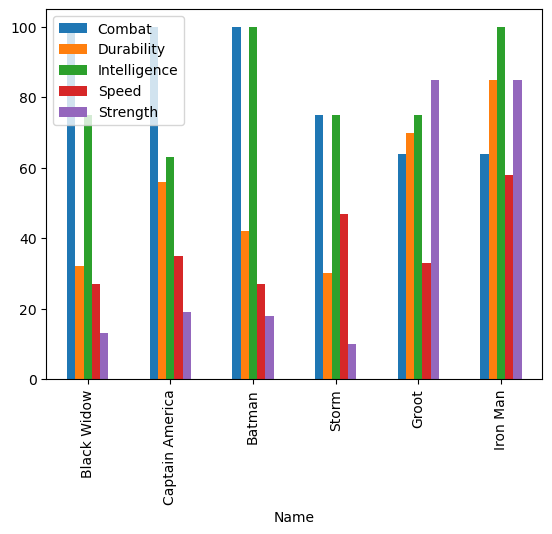

In [26]:
hero_df.plot(kind="bar",y=["Combat","Durability","Intelligence","Speed","Strength"])

# Tasks

Fun though it is to work with Marvel Superhero data, for the remainder of this session we will use some more scientific data. You will probably want to consult both the padnas documentation on its [website](https://pandas.pydata.org/docs/) as well as the sumary above. Pandas is a big library and it's not possible to give a comprehensive tutorial in a single lab session, but it is well documented and has a large number of users.

## Task 1

<div class="task">
    
The first task will be to download some data about the periodic table from github. The file you need is located at:
    
<a href="https://github.com/andrejewski/periodic-table/raw/master/data.json">https://github.com/andrejewski/periodic-table/raw/master/data.json</a>
    
The data is stored in JSON format - a common format used for exchanging information on the web as it is easily readable by JavaScript. Fortunately pandas can also read this format, and even more conveniently, can read it directly from the internet!
</div>

<div class="task">
<ol>
    <li>Set the index of the data frame to be the chemical symbol of the element</li>
    <li>Identify the most electronegative and least electronegative element in the data set<br/>
        <b>NB</b>Some of the data has missing values and in the original data this is represented by an empty string ''. I will be easier to work with the data if you replace the empty strings with `np.NaN` (not a number) values.Look up DataFrame.replace() to see how to do this.</li>
    <li>Make a plot of atomic radius against atomic number.</li>
    <li>Create a new data frame of the metallic elements and determine how many there are.</li>
    <li>Sort the metals by order of the year of discovery<br/>
        <b>NB</b>You can replace the "Ancient" years with the year 0.</li>
 </ol>
 </div>
    

In [27]:
periodic_table=pd.read_json("https://github.com/andrejewski/periodic-table/raw/master/data.json")

In [28]:
'''1. Set the index of the data frame to be the chemical symbol of the element'''
periodic_table = periodic_table.set_index("symbol")
periodic_table.head(10)

,atomicNumber,name,atomicMass,cpkHexColor,electronicConfiguration,electronegativity,atomicRadius,ionRadius,vanDelWaalsRadius,ionizationEnergy,electronAffinity,oxidationStates,standardState,bondingType,meltingPoint,boilingPoint,density,groupBlock,yearDiscovered
symbol,,,,,,,,,,,,,,,,,,,
H,1,Hydrogen,1.00794(4),FFFFFF,1s1,2.2,37,,120,1312,-73,"-1, 1",gas,diatomic,14,20,0.00009,nonmetal,1766
He,2,Helium,4.002602(2),D9FFFF,1s2,,32,,140,2372,0,,gas,atomic,,4,0.000179,noble gas,1868
Li,3,Lithium,6.941(2),CC80FF,[He] 2s1,0.98,134,76 (+1),182,520,-60,1,solid,metallic,454,1615,0.535,alkali metal,1817
Be,4,Beryllium,9.012182(3),C2FF00,[He] 2s2,1.57,90,45 (+2),,900,0,2,solid,metallic,1560,2743,1.848,alkaline earth metal,1798
B,5,Boron,10.811(7),FFB5B5,[He] 2s2 2p1,2.04,82,27 (+3),,801,-27,"1, 2, 3",solid,covalent network,2348,4273,2.46,metalloid,1807
C,6,Carbon,12.0107(8),909090,[He] 2s2 2p2,2.55,77,16 (+4),170,1087,-154,"-4, -3, -2, -1, 1, 2, 3, 4",solid,covalent network,3823,4300,2.26,nonmetal,Ancient
N,7,Nitrogen,14.0067(2),3050F8,[He] 2s2 2p3,3.04,75,146 (-3),155,1402,-7,"-3, -2, -1, 1, 2, 3, 4, 5",gas,diatomic,63,77,0.001251,nonmetal,1772
O,8,Oxygen,15.9994(3),FF0D0D,[He] 2s2 2p4,3.44,73,140 (-2),152,1314,-141,"-2, -1, 1, 2",gas,diatomic,55,90,0.001429,nonmetal,1774
F,9,Fluorine,18.9984032(5),8999999999999999938988538069254651788155375977...,[He] 2s2 2p5,3.98,71,133 (-1),147,1681,-328,-1,gas,atomic,54,85,0.001696,halogen,1670


In [29]:
'''2. Identify the most electronegative and least electronegative element in the data set
NBSome of the data has missing values and in the original data this is represented by an empty string ''. 
I will be easier to work with the data if you replace the empty strings with `np.NaN` (not a number) values.
Look up DataFrame.replace() to see how to do this.'''
periodic_table = periodic_table.replace(to_replace="", value=np.NaN, inplace=False)
# periodic_table1.head()
Max = np.max(periodic_table['electronegativity'])
Min = np.min(periodic_table['electronegativity'])
print("Max charge = ",np.around(Max,3))
print("Min charge = ",np.around(Min,3))

Max charge =  3.98
Min charge =  0.7


<Axes: xlabel='[atomicNumber]', ylabel='[atomicRadius]'>

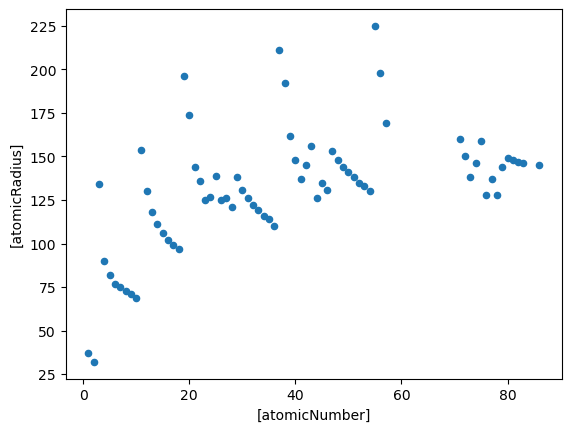

In [30]:
'''3. Make a plot of atomic radius against atomic number.'''
periodic_table.plot(kind="scatter",x=["atomicNumber"],y=["atomicRadius"])

In [31]:
'''4. Create a new data frame of the metallic elements and determine how many there are.'''
metallic_elements = periodic_table.loc[periodic_table["bondingType"]== "metallic"]
metallic_elements.head(10)

,atomicNumber,name,atomicMass,cpkHexColor,electronicConfiguration,electronegativity,atomicRadius,ionRadius,vanDelWaalsRadius,ionizationEnergy,electronAffinity,oxidationStates,standardState,bondingType,meltingPoint,boilingPoint,density,groupBlock,yearDiscovered
symbol,,,,,,,,,,,,,,,,,,,
Li,3,Lithium,6.941(2),CC80FF,[He] 2s1,0.98,134.0,76 (+1),182.0,520.0,-60.0,1,solid,metallic,454.0,1615.0,0.535,alkali metal,1817
Be,4,Beryllium,9.012182(3),C2FF00,[He] 2s2,1.57,90.0,45 (+2),NaN,900.0,0.0,2,solid,metallic,1560.0,2743.0,1.848,alkaline earth metal,1798
Na,11,Sodium,22.98976928(2),AB5CF2,[Ne] 3s1,0.93,154.0,102 (+1),227.0,496.0,-53.0,"-1, 1",solid,metallic,371.0,1156.0,0.968,alkali metal,1807
Mg,12,Magnesium,24.3050(6),8AFF00,[Ne] 3s2,1.31,130.0,72 (+2),173.0,738.0,0.0,"1, 2",solid,metallic,923.0,1363.0,1.738,alkaline earth metal,1808
Al,13,Aluminum,26.9815386(8),BFA6A6,[Ne] 3s2 3p1,1.61,118.0,53.5 (+3),NaN,578.0,-43.0,"1, 3",solid,metallic,933.0,2792.0,2.700,metal,Ancient
Si,14,Silicon,28.0855(3),F0C8A0,[Ne] 3s2 3p2,1.90,111.0,40 (+4),210.0,787.0,-134.0,"-4, -3, -2, -1, 1, 2, 3, 4",solid,metallic,1687.0,3173.0,2.330,metalloid,1854
K,19,Potassium,39.0983(1),8F40D4,[Ar] 4s1,0.82,196.0,138 (+1),275.0,419.0,-48.0,1,solid,metallic,337.0,1032.0,0.856,alkali metal,1807
Ca,20,Calcium,40.078(4),3DFF00,[Ar] 4s2,1.00,174.0,100 (+2),NaN,590.0,-2.0,2,solid,metallic,1115.0,1757.0,1.550,alkaline earth metal,Ancient
Sc,21,Scandium,44.955912(6),E6E6E6,[Ar] 3d1 4s2,1.36,144.0,74.5 (+3),NaN,633.0,-18.0,"1, 2, 3",solid,metallic,1814.0,3103.0,2.985,transition metal,1876


## Task 2

A really common thing that one needs to do in Data Science is to combine information from a number of different sources. In this example, we will combine the information from the web about elements in the periodic table with some data we have about superconductors.

<div class="task">
    <p>The file <i>Superconductors.xlsx</i> that was in the same folder on Minerva as the task sheet has some data about various superconductors.The aim of this task is to combine the data in this file with the periodic table data to be able to correlate the superconducting properties with the element properties.<p>
    <ol>
        <li>Download the file and read it into a new pandas data frame.</li>
        <li>Inspect the columns and set the index to be the column with the chemical formula.</li>
        <li>Keep only those superconductors that are elements in the periodic table and make a new DataFrame that combines the information about the superconducting elements.<br/>
            To do this you will need to do several steps:
            <ol>
                <li>Some elements have more than one phase that superconducts and so have two rows with the same chemical symbol. The `DataFrame.index.duplicated` will show which rows have a duplicate index. You can then invert this with the ~ operator and use that with the `DataFrame.loc` location to select non-duplicate element rows.</li>
               <li> The `pd.concat` function can be used to join two DataFrames together - it will pay attention to the row labels and column names to match the rows or columns between the two data frames. You can give it an <i>axis=</i> parameter to tell it to joint he dataframes by row or columns.</li>
    </ol>
            <li>Make a plot of the atomic number versus critical temperature T_C and the critical field H_C versus T_C.</li>
        <li>Finally, save the combined dataset to an Excel spreadsheet file and check you can open it in Excel.</li>
    </ol>
           
</div>

In [32]:
'''1. Download the file and read it into a new pandas data frame.'''
superconductors_df = pd.read_excel('Superconductors.xlsx')
superconductors_df.head()

,Substance,Phase,Class,T_C,H_C,Type,BCS,Notes
0,Ba8Si46,NaN,Compound,8.07,0.008,II,yes,NaN
1,C2Li,NaN,Compound,1.90,NaN,II,no,NaN
2,C2Na,NaN,Compound,5.00,NaN,II,no,NaN
3,C3K,NaN,Compound,3.00,NaN,II,no,NaN
4,C3Li,NaN,Compound,0.35,NaN,II,no,NaN


In [33]:
'''2. Inspect the columns and set the index to be the column with the chemical formula.'''
superconductors_df = superconductors_df.set_index("Substance")

In [63]:
''' 3. Keep only those superconductors that are elements in the periodic table and make a new DataFrame that combines the information about the superconducting elements.'''
filter_rows_1 = superconductors_df[superconductors_df['Class']=='Element']
duplicate_indices = filter_rows_1.index.duplicated()
indices = ~duplicate_indices
unique_superconductors_df = filter_rows_1.loc[indices]
unique_superconductors_df
combined_df = pd.merge(unique_superconductors_df, metallic_elements, left_index=True, right_index=True, how='inner')
combined_df

,Phase,Class,T_C,H_C,Type,BCS,Notes,atomicNumber,name,atomicMass,...,ionizationEnergy,electronAffinity,oxidationStates,standardState,bondingType,meltingPoint,boilingPoint,density,groupBlock,yearDiscovered
Al,NaN,Element,1.200000,0.01,I,yes,NaN,13,Aluminum,26.9815386(8),...,578.0,-43.0,"1, 3",solid,metallic,933.0,2792.0,2.700,metal,Ancient
Bi,NaN,Element,0.000530,0.000005,I,no,NaN,83,Bismuth,208.98040(1),...,703.0,-91.0,"-3, 3, 5",solid,metallic,544.0,1837.0,9.780,metal,Ancient
Cd,NaN,Element,0.520000,0.0028,I,yes,NaN,48,Cadmium,112.411(8),...,868.0,0.0,2,solid,metallic,594.0,1040.0,8.650,transition metal,1817
Ga,NaN,Element,1.083000,0.0058,I,yes,NaN,31,Gallium,69.723(1),...,579.0,-29.0,"1, 2, 3",solid,metallic,303.0,2477.0,5.904,metal,1875
Hf,NaN,Element,0.165000,NaN,I,yes,NaN,72,Hafnium,178.49(2),...,659.0,0.0,"2, 3, 4",solid,metallic,2506.0,4876.0,13.310,transition metal,1923
Hg,alpha,Element,4.150000,0.04,I,yes,NaN,80,Mercury,200.59(2),...,1007.0,0.0,"1, 2, 4",liquid,metallic,234.0,630.0,13.534,transition metal,Ancient
In,NaN,Element,3.400000,0.03,I,yes,NaN,49,Indium,114.818(3),...,558.0,-29.0,"1, 2, 3",solid,metallic,430.0,2345.0,7.310,metal,1863
Ir,NaN,Element,0.140000,0.0016,I,yes,NaN,77,Iridium,192.217(3),...,880.0,-151.0,"-3, -1, 1, 2, 3, 4, 5, 6",solid,metallic,2739.0,4701.0,22.650,transition metal,1803
La,beta,Element,6.300000,NaN,I,yes,NaN,57,Lanthanum,138.90547(7),...,538.0,-48.0,"2, 3",solid,metallic,1193.0,3737.0,6.146,lanthanoid,1839
Li,NaN,Element,0.000400,NaN,I,no,NaN,3,Lithium,6.941(2),...,520.0,-60.0,1,solid,metallic,454.0,1615.0,0.535,alkali metal,1817


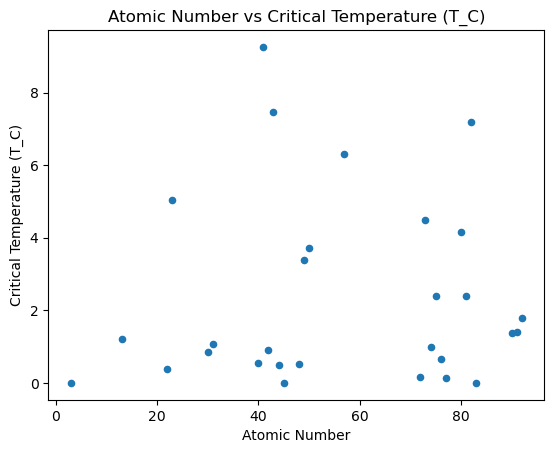

In [67]:
'''4. Make a plot of the atomic number versus critical temperature T_C and the critical field H_C versus T_C.'''
combined_df.plot(kind="scatter", x="atomicNumber", y="T_C")
plt.xlabel("Atomic Number")
plt.ylabel("Critical Temperature (T_C)")
plt.title("Atomic Number vs Critical Temperature (T_C)")
plt.show()

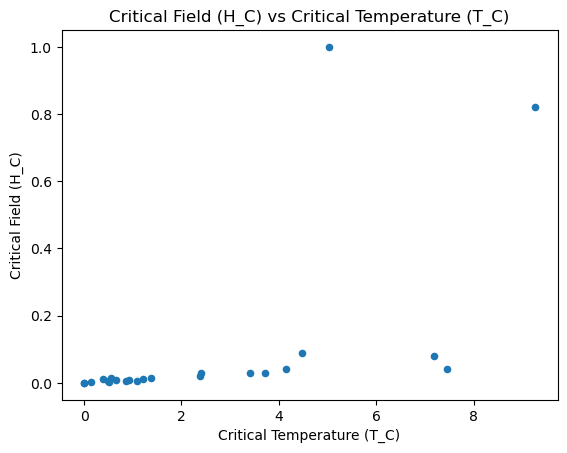

In [69]:
combined_df.plot(kind="scatter", x="T_C", y="H_C")
plt.xlabel("Critical Temperature (T_C)")
plt.ylabel("Critical Field (H_C)")
plt.title("Critical Field (H_C) vs Critical Temperature (T_C)")
plt.show()

In [ ]:
'''5. Finally, save the combined dataset to an Excel spreadsheet file and check you can open it in Excel.